# Recommmender System for MovieLens 

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.


# Features

**The first dataset contains the following features:**

* movie_id - A unique identifier for each movie.
* title - Title of the movie.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.

**The second dataset contains the following features:**

* movie_id  This is the movie_id as in the first dataset.
* rating  ratings the movie recieved
* UserId This is the user id 




## Visualization Imports

In [130]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

## Load Data 

In [131]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')


In [132]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [133]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Let's merge them together:

In [134]:
df = pd.merge(movies_df,ratings_df,on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


## EDA (Explolatory Data Analyst)

Let's explore the data a bit and get a look at some of the best rated movies.

In [135]:
movies_df['movieId'].nunique()

9742

In [136]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [137]:
ratings_df['userId'].nunique()

610

In [138]:
ratings_df['movieId'].nunique()

9724

In [139]:
sns.set_style('white')

Let's create a ratings dataframe with average rating and number of ratings:

In [140]:
# Most top 5 rating movies, titles of the movies that have the most ratings 
df.groupby('title').count()['rating'].sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [141]:
df['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [142]:
df['rating'].nunique()

10

In [143]:
# movies with the best ratings 
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [144]:
df[df['title']=='Karlson Returns (1970)']['rating'].value_counts()

5.0    1
Name: rating, dtype: int64

In [145]:
df[df['title']=='Winter in Prostokvashino (1984)']['rating'].value_counts()


5.0    1
Name: rating, dtype: int64

In [146]:
df[df['title']=='My Love (2006)']['rating'].value_counts()


5.0    1
Name: rating, dtype: int64

In [147]:
ratings =  pd.DataFrame(df.groupby('title')['rating'].mean())

In [148]:
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


The rating kind of depends on how many people rated it because seeing something is a five star rating doesn't 
really help if you only have one person that rated it versus a thousand people that rated it. So you get an idea of 
the number of ratings. 

Let's go a head and create a number of ratings column right next to this rating column 

In [149]:
ratings ['num of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [150]:
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [151]:
df[df['title']=='71(2014)']['rating'].count()

0

<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

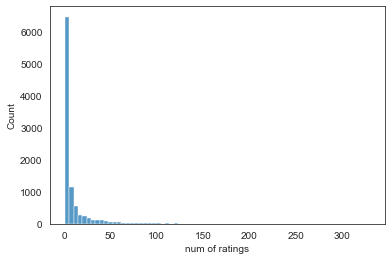

In [152]:
sns.histplot(data=ratings['num of ratings'],bins=70)

We can see here that most of our number of ratings are few if we look at the movies most of the movies have either 0 or 1 
rating which kind of makes sense. Most people only watch the famous or big hits. So those are going to be the ones a lot of reviews or number of ratings 

<AxesSubplot:xlabel='rating', ylabel='Count'>

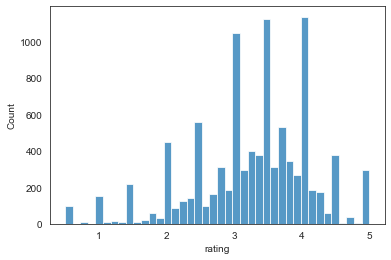

In [153]:
sns.histplot(data=ratings['rating'],bins=40)

Now lets explore the distribution or relationship between the actual average rating and the number of ratings 

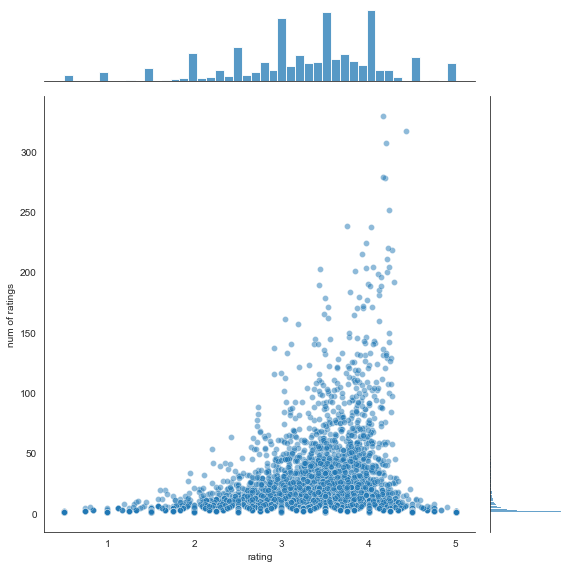

In [154]:
# we can use seaborn joint plot to explore this 
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5,height=8)



Looking at this data it looks like as you get more ratings you're more likely to actually have a higher rating of a movie 
and that kind of make sense because if your movie is better, the better your movie the more people that are going to 
watch it and the more people that are going to watch it the more likely you're going to have a higher number of people reviewing or rating the movie.

so this trend of more reviews more ratings makes sense and it makes sense that these one to two star movies have very few ratings versus these kind of better movies have a lot of viewers. 

You can see an outlier here at below one and five stars that's most likely due to just one person watching one movie putting a five star on it and thats it. Because even if you're a blockbuster in a fantastic movie it's really unlikely that everyone is going to rate you a five star. 

## Recommending Similar Movies

In [155]:
moviemat = df.pivot_table(index ='userId',columns='title',values='rating')

In [156]:
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We notice that we have a lot of missing values and that actually makes sense because most people have not seen most of the movies. 

We can go ahead and do is check out some of the most rated movies again by saying: 

In [157]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


Now looking back at this or going to go ahead and choose two movies: Forrest Gump (1994) and Matrix, The (1999)

We're going to go a head and grab the user ratings for those two movies:

In [158]:
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Now let's grab the user ratings for those two movies:

In [159]:
ForrestGump_user_ratings = moviemat['Forrest Gump (1994)']
Matrix_user_ratings = moviemat['Matrix, The (1999)']

In [160]:
ForrestGump_user_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [161]:
Matrix_user_ratings.head()

userId
1    5.0
2    NaN
3    NaN
4    1.0
5    NaN
Name: Matrix, The (1999), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [162]:
similar_to_ForrestGump = moviemat.corrwith(ForrestGump_user_ratings)
similar_to_Matrix = moviemat.corrwith(Matrix_user_ratings)

C:\Users\hi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\hi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [163]:
corr_ForrestGump = pd.DataFrame(similar_to_ForrestGump,columns=['Correlation'])
corr_ForrestGump.dropna(inplace=True)

In [164]:
corr_ForrestGump

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000
...,...
[REC]² (2009),-0.052414
eXistenZ (1999),0.011189
xXx (2002),0.306817


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched Forrest Gump (it was the most popular movie). 

In [165]:
corr_ForrestGump.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


As we can see above the movies perfectly correlated with Forrest Gump. Now the reason that doesn't make sense is because most
likely these movies happened to have been seen only by one person who also happened to rate Forrest Gump **five stars**. 

What we can do is go ahead and fix this by filtering out movies that have less than a certain number of reviews so we can set a threshold for the number of ratings necessary in order to put into our model. 

In [166]:
corr_ForrestGump = corr_ForrestGump.join(ratings['num of ratings'])

In [167]:
corr_ForrestGump.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


All right so we're going to do now is filter out any movies that don't have at least 100 number of ratings:

In [168]:
corr_ForrestGump[corr_ForrestGump['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125


Now lets do the same for movie matrix 

In [169]:
corr_matrix = pd.DataFrame(similar_to_Matrix,columns=['Correlation'])

In [170]:
corr_matrix.dropna(inplace=True)

In [171]:
corr_matrix = corr_matrix.join(ratings['num of ratings'])

In [172]:
corr_matrix.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",-0.160843,17
(500) Days of Summer (2009),0.302316,42
*batteries not included (1987),0.392232,7
...And Justice for All (1979),0.654654,3
10 Cent Pistol (2015),-1.000000,2


In [173]:
corr_matrix[corr_matrix['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
"Matrix, The (1999)",1.000000,278
Die Hard (1988),0.544466,145
Inception (2010),0.514767,143
Braveheart (1995),0.496045,237
Aliens (1986),0.470865,126


## Train Test Split

Recommendation Systems by their very nature are very difficult to evaluate, but we will still show you how to evaluate them in here. In order to do this, we'll split our data into two sets. However, we won't do our classic X_train,X_test,y_train,y_test split. Instead we can actually just segement the data into two sets of data:

In [184]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25)

In [185]:
train_data.shape , test_data.shape

((75627, 6), (25209, 6))

In [186]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [187]:
n_users = df.userId.nunique()
n_items = df.movieId.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 610
Num of Movies: 9724


## Memory-Based Collaborative Filtering

Memory-Based Collaborative Filtering approaches can be divided into two main sections: **user-item filtering** and **item-item filtering**. 

A *user-item filtering* will take a particular user, find users that are similar to that user based on similarity of ratings, and recommend items that those similar users liked. 

In contrast, *item-item filtering* will take an item, find users who liked that item, and find other items that those users or similar users also liked. It takes items and outputs other items as recommendations. 

* *Item-Item Collaborative Filtering*: “Users who liked this item also liked …”
* *User-Item Collaborative Filtering*: “Users who are similar to you also liked …”

In both cases, you create a user-item matrix which built from the entire dataset.

Since we have split the data into testing and training we will need to create two ``[610 x 9724]`` matrices (all users by all movies). 

The training matrix contains 75% of the ratings and the testing matrix contains 25% of the ratings.  

After you have built the user-item matrix you calculate the similarity and create a similarity matrix. 

The similarity values between items in *Item-Item Collaborative Filtering* are measured by observing all the users who have rated both items.  



For *User-Item Collaborative Filtering* the similarity values between users are measured by observing all the items that are rated by both users.

A distance metric commonly used in recommender systems is *cosine similarity*, where the ratings are seen as vectors in ``n``-dimensional space and the similarity is calculated based on the angle between these vectors. 
Cosine similiarity for users *a* and *m* can be calculated using the formula below, where you take dot product of  the user vector *$u_k$* and the user vector *$u_a$* and divide it by multiplication of the Euclidean lengths of the vectors.
<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(u_k,u_a)=\frac{u_k&space;\cdot&space;u_a&space;}{&space;\left&space;\|&space;u_k&space;\right&space;\|&space;\left&space;\|&space;u_a&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{k,m}x_{a,m}}{\sqrt{\sum&space;x_{k,m}^2\sum&space;x_{a,m}^2}}"/>

To calculate similarity between items *m* and *b* you use the formula:

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(i_m,i_b)=\frac{i_m&space;\cdot&space;i_b&space;}{&space;\left&space;\|&space;i_m&space;\right&space;\|&space;\left&space;\|&space;i_b&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{a,m}x_{a,b}}{\sqrt{\sum&space;x_{a,m}^2\sum&space;x_{a,b}^2}}
"/>

Our first step will be to create the user-item matrix. Since we have both testing and training data we need to create two matrices.  

In [196]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

We can use the [pairwise_distances](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html) function from sklearn to calculate the cosine similarity. Note, the output will range from 0 to 1 since the ratings are all positive.

In [210]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

Next step is to make predictions. We have already created similarity matrices: `user_similarity` and `item_similarity` and therefore you can make a prediction by applying following formula for user-based CF:

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?\hat{x}_{k,m}&space;=&space;\bar{x}_{k}&space;&plus;&space;\frac{\sum\limits_{u_a}&space;sim_u(u_k,&space;u_a)&space;(x_{a,m}&space;-&space;\bar{x_{u_a}})}{\sum\limits_{u_a}|sim_u(u_k,&space;u_a)|}"/>

You can look at the similarity between users *k* and *a* as weights that are multiplied by the ratings of a similar user *a* (corrected for the average rating of that user). You will need to normalize it so that the ratings stay between 1 and 5 and, as a final step, sum the average ratings for the user that you are trying to predict. 

The idea here is that some users may tend always to give high or low ratings to all movies. The relative difference in the ratings that these users give is more important than the absolute values. To give an example: suppose, user *k* gives 4 stars to his favourite movies and 3 stars to all other good movies. Suppose now that another user *t* rates movies that he/she likes with 5 stars, and the movies he/she fell asleep over with 3 stars. These two users could have a very similar taste but treat the rating system differently. 

When making a prediction for item-based CF you don't need to correct for users average rating since query user itself is used to do predictions.

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?\hat{x}_{k,m}&space;=&space;\frac{\sum\limits_{i_b}&space;sim_i(i_m,&space;i_b)&space;(x_{k,b})&space;}{\sum\limits_{i_b}|sim_i(i_m,&space;i_b)|}"/>

In [211]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [212]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

### Evaluation
There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is *Root Mean Squared Error (RMSE)*. 
<img src="https://latex.codecogs.com/gif.latex?RMSE&space;=\sqrt{\frac{1}{N}&space;\sum&space;(x_i&space;-\hat{x_i})^2}" title="RMSE =\sqrt{\frac{1}{N} \sum (x_i -\hat{x_i})^2}" />

We can use the [mean_square_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (MSE) function from `sklearn`, where the RMSE is just the square root of MSE. 

In [213]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [214]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.4678878311665073
Item-based CF RMSE: 3.5039229502856752
